In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import statsmodels.api as sm

In [2]:
df = pd.read_csv('Admission_Predict.csv')
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,1
1,2,324,107,4,4.0,4.5,8.87,1,1
2,3,316,104,3,3.0,3.5,8.00,1,0
3,4,322,110,3,3.5,2.5,8.67,1,1
4,5,314,103,2,2.0,3.0,8.21,0,0


In [3]:
df.shape

(400, 9)

In [4]:
df.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    int64  
dtypes: float64(3), int64(6)
memory usage: 28.2 KB


In [6]:
df.drop('Serial No.',axis=1,inplace=True)
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,1
1,324,107,4,4.0,4.5,8.87,1,1
2,316,104,3,3.0,3.5,8.00,1,0
3,322,110,3,3.5,2.5,8.67,1,1
4,314,103,2,2.0,3.0,8.21,0,0


In [7]:
X = df.drop('Chance of Admit',axis=1)
y = df['Chance of Admit']

In [8]:
from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest = train_test_split(X,y,test_size=0.2,random_state=10)

In [9]:
ytrain.value_counts(normalize=True)

0    0.55625
1    0.44375
Name: Chance of Admit, dtype: float64

In [10]:
xtrain_c = sm.add_constant(xtrain)
xtest_c = sm.add_constant(xtest)

In [11]:
logreg = sm.Logit(ytrain,xtrain_c).fit()
print(logreg.summary())

Optimization terminated successfully.
         Current function value: 0.241326
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:        Chance of Admit   No. Observations:                  320
Model:                          Logit   Df Residuals:                      312
Method:                           MLE   Df Model:                            7
Date:                Tue, 27 Jun 2023   Pseudo R-squ.:                  0.6486
Time:                        08:58:47   Log-Likelihood:                -77.224
converged:                       True   LL-Null:                       -219.78
Covariance Type:            nonrobust   LLR p-value:                 9.137e-58
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               -63.1763     11.315     -5.583      0.000     -85.354     -40.998
GRE Scor

In [12]:
logreg.llr_pvalue

9.136840797093485e-58

In [13]:
 logreg.params

const               -63.176338
GRE Score             0.053187
TOEFL Score           0.032814
University Rating     0.515006
SOP                   0.175796
LOR                   0.570331
CGPA                  4.411370
Research              0.581890
dtype: float64

In [14]:
odds = np.exp(logreg.params)
odds

const                3.654811e-28
GRE Score            1.054626e+00
TOEFL Score          1.033359e+00
University Rating    1.673648e+00
SOP                  1.192195e+00
LOR                  1.768853e+00
CGPA                 8.238225e+01
Research             1.789418e+00
dtype: float64

### Comment:
One unit change in GRE score brings 1.054 times change in the odds

In [17]:
ypred_prob = logreg.predict(xtest_c)

In [18]:
ypred_prob[0:5]

332    0.050634
111    0.800663
352    0.016492
205    0.000668
56     0.001146
dtype: float64

In [19]:
ypred = [0 if i<0.5 else 1 for i in ypred_prob]
ypred[0:5]

[0, 1, 0, 0, 0]

In [20]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest,ypred)

0.825

In [27]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(ytest,ypred)
cm

array([[33,  9],
       [ 5, 33]], dtype=int64)

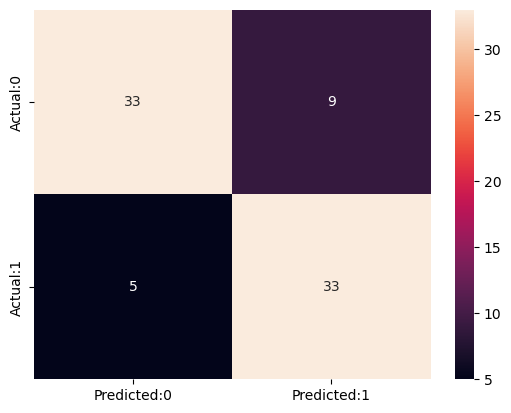

In [28]:
conf_matrix = pd.DataFrame(data = cm,
                           columns = ['Predicted:0','Predicted:1'], 
                           index = ['Actual:0','Actual:1'])

sns.heatmap(conf_matrix,annot=True)
plt.show()

In [29]:
TN = cm[0,0]
FP = cm[0,1]
FN = cm[1,0]
TP = cm[1,1]

In [30]:
# Sensitivity recall for True Positive

sensitivity = TP/(TP+FN)
sensitivity

0.868421052631579

In [31]:
# Specificity recall for Negative Class
specificity = TN/(TN+FP)
specificity

0.7857142857142857

In [32]:
from sklearn.metrics import classification_report
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.87      0.79      0.82        42
           1       0.79      0.87      0.82        38

    accuracy                           0.82        80
   macro avg       0.83      0.83      0.82        80
weighted avg       0.83      0.82      0.82        80



In [33]:
from sklearn.metrics import log_loss

print(log_loss(ytest,ypred))

6.307639343095502


In [34]:
from sklearn.metrics import roc_auc_score,roc_curve

In [36]:
print(roc_curve(ytest,ypred_prob))

(array([0.        , 0.        , 0.        , 0.02380952, 0.02380952,
       0.04761905, 0.04761905, 0.14285714, 0.14285714, 0.23809524,
       0.23809524, 0.30952381, 0.30952381, 0.33333333, 0.33333333,
       0.54761905, 0.54761905, 1.        ]), array([0.        , 0.02631579, 0.63157895, 0.63157895, 0.71052632,
       0.71052632, 0.76315789, 0.76315789, 0.86842105, 0.86842105,
       0.92105263, 0.92105263, 0.94736842, 0.94736842, 0.97368421,
       0.97368421, 1.        , 1.        ]), array([1.99954144e+00, 9.99541441e-01, 9.31355628e-01, 9.09319667e-01,
       8.60956416e-01, 8.58806131e-01, 8.41911606e-01, 7.97157602e-01,
       6.18555435e-01, 4.92806012e-01, 3.80298891e-01, 2.33502048e-01,
       2.21233752e-01, 2.20817772e-01, 1.95004427e-01, 6.35077653e-02,
       5.06341297e-02, 1.00881402e-04]))


In [37]:
fpr,tpr,threshold = roc_curve(ytest,ypred_prob)

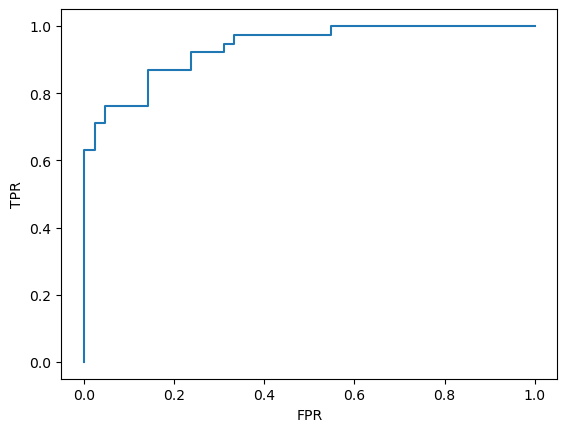

In [39]:
plt.plot(fpr,tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

In [40]:
### Reliability

from sklearn.metrics import cohen_kappa_score

cohen_kappa_score(ytest,ypred)

0.6508728179551122

### The reliability score of the model is good

In [48]:
from sklearn.metrics import recall_score,precision_score,f1_score

In [49]:
perf_score = pd.DataFrame(columns=["Model", "Accuracy","Recall","Precision","F1 Score"] )

In [50]:
def per_measures(model,test,pred):
    accuracy    =accuracy_score(test,pred)
    f1score     =f1_score(test,pred)
    recall      =recall_score(test,pred)
    precision   =precision_score(test,pred)
    # aic         =model.aic
    # reliability = cohen_kappa_score(test,pred)
    
    return (accuracy,recall,precision,f1score)

In [51]:
def update_performance (name,model,test,pred):

    # assign 'comp_perf' as global variable
    global perf_score


    # append the results to the dataframe 'score_card'
    # 'ignore_index = True' do not consider the index labels
    perf_score = perf_score.append({'Model'       : name,
                                    'Accuracy'    : per_measures(model,test,pred)[0],
                                    'Recall'      : per_measures(model,test,pred)[1],
                                    'Precision'   : per_measures(model,test,pred)[2],
                                    'F1 Score'    : per_measures(model,test,pred)[3]
                                    # 'AIC'         : per_measures(model,ytest,ypred)[4],
                                    # 'Reliability' : per_measures(model,ytest,ypred)[5]

                                     },
                                   ignore_index = True)

In [52]:
import warnings
warnings.filterwarnings('ignore')

In [53]:
update_performance(name = 'LogisticReg-Base',model=logreg,test=ytest,pred=ypred)

perf_score

,Model,Accuracy,Recall,Precision,F1 Score
0,LogisticReg-Base,0.825,0.868421,0.785714,0.825


In [54]:
## Importing the functions from sklearn

from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score

In [55]:
# consider a list of values for cut-off

cutoff_per = pd.DataFrame(columns=['Probability Cutoff', 'AUC Score', 'Precision Score', 'Recall Score',
                                       'Accuracy Score', 'Kappa Score', 'f1-score'])

thresh_value = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]


for cutoff in thresh_value:
    ypred_prob = logreg.predict(xtest_c)
    ypred = [ 0 if x < cutoff else 1 for x in ypred_prob]

    global cutoff_per

    # append the results to the dataframe 'score_card'
    # 'ignore_index = True' do not consider the index labels
    cutoff_per = cutoff_per.append({'Probability Cutoff': cutoff,
                                    'AUC Score' : metrics.roc_auc_score(ytest, ypred),
                                    'Precision Score': metrics.precision_score(ytest, ypred),
                                    'Recall Score': metrics.recall_score(ytest, ypred),
                                    'Accuracy Score': metrics.accuracy_score(ytest, ypred),
                                    'Kappa Score':metrics.cohen_kappa_score(ytest, ypred),
                                    'f1-score': metrics.f1_score(ytest, ypred)},
                                    ignore_index = True)

In [56]:
cutoff_per

,Probability Cutoff,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,0.1,0.760652,0.660714,0.973684,0.7500,0.509804,0.787234
1,0.2,0.807018,0.720000,0.947368,0.8000,0.604938,0.818182
2,0.3,0.829574,0.760870,0.921053,0.8250,0.652605,0.833333
3,0.4,0.828321,0.772727,0.894737,0.8250,0.651741,0.829268
4,0.5,0.827068,0.785714,0.868421,0.8250,0.650873,0.825000
5,0.6,0.862782,0.846154,0.868421,0.8625,0.724656,0.857143
6,0.7,0.823308,0.833333,0.789474,0.8250,0.648241,0.810811
7,0.8,0.822055,0.852941,0.763158,0.8250,0.647355,0.805556
8,0.9,0.803885,0.960000,0.631579,0.8125,0.617834,0.761905


In [57]:
youdens_table = pd.DataFrame({'TPR': tpr,
                              'FPR': fpr,
                             'Threshold': threshold})


# calculate the difference between TPR and FPR for each threshold and store the values in a new column 'Difference'
youdens_table['Difference'] = youdens_table.TPR - youdens_table.FPR


youdens_table = youdens_table.sort_values('Difference', ascending = False).reset_index(drop = True)

# print the first five observations
youdens_table.head()

,TPR,FPR,Threshold,Difference
0,0.868421,0.142857,0.618555,0.725564
1,0.763158,0.047619,0.841912,0.715539
2,0.710526,0.023810,0.860956,0.686717
3,0.921053,0.238095,0.380299,0.682957
4,0.710526,0.047619,0.858806,0.662907


In [58]:
y_pred_youden = [0 if x<0.62 else 1 for x in ypred_prob]

In [61]:
acc_table = classification_report(ytest,y_pred_youden)

print(acc_table)

              precision    recall  f1-score   support

           0       0.86      0.86      0.86        42
           1       0.84      0.84      0.84        38

    accuracy                           0.85        80
   macro avg       0.85      0.85      0.85        80
weighted avg       0.85      0.85      0.85        80



In [62]:
update_performance(name = 'LogisticReg-Youden',model = logreg,test = ytest,pred = y_pred_youden)

perf_score

,Model,Accuracy,Recall,Precision,F1 Score
0,LogisticReg-Base,0.825,0.868421,0.785714,0.825000
1,LogisticReg-Youden,0.850,0.842105,0.842105,0.842105


### SKLEARN - Logistic Regression

In [64]:
from sklearn.linear_model import LogisticRegression

In [65]:
xtrain,xtest,ytrain,ytest = train_test_split(X,y,test_size=0.2,random_state=10)

In [66]:
lr = LogisticRegression()
lr.fit(xtrain,ytrain)

ypred_lr_train = lr.predict(xtrain)
ypred_lr = lr.predict(xtest)

ypred_lr

array([0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0], dtype=int64)

In [67]:
print(accuracy_score(ytrain,ypred_lr_train))
print(confusion_matrix(ytrain,ypred_lr_train))
print(classification_report(ytrain,ypred_lr_train))

0.8625
[[159  19]
 [ 25 117]]
              precision    recall  f1-score   support

           0       0.86      0.89      0.88       178
           1       0.86      0.82      0.84       142

    accuracy                           0.86       320
   macro avg       0.86      0.86      0.86       320
weighted avg       0.86      0.86      0.86       320



In [68]:
print(accuracy_score(ytest,ypred_lr))
print(confusion_matrix(ytest,ypred_lr))
print(classification_report(ytest,ypred_lr))

0.775
[[32 10]
 [ 8 30]]
              precision    recall  f1-score   support

           0       0.80      0.76      0.78        42
           1       0.75      0.79      0.77        38

    accuracy                           0.78        80
   macro avg       0.78      0.78      0.77        80
weighted avg       0.78      0.78      0.78        80



In [69]:
update_performance(name = 'LogisticReg-skl',model = lr,test = ytest,pred = ypred_lr)

perf_score

,Model,Accuracy,Recall,Precision,F1 Score
0,LogisticReg-Base,0.825,0.868421,0.785714,0.825000
1,LogisticReg-Youden,0.850,0.842105,0.842105,0.842105
2,LogisticReg-skl,0.775,0.789474,0.750000,0.769231
